In [1]:
import vis

In [15]:
from keras.models import model_from_json

# the name of the file containg model.
# x.json.. x.h5 must must the weights
model_file = 'model4.json'

with open(model_file, 'r') as jfile:
    # NOTE: if you saved the file by calling json.dump(model.to_json(), ...)
    # then you will have to call:
    #
    # model = model_from_json(json.loads(jfile.read()))
    #
    # instead.
    model = model_from_json(jfile.read())

model.compile("adam", "mse")
weights_file = model_file.replace('json', 'h5')
model.load_weights(weights_file)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 16, 32, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 30, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 14, 30, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 15, 8)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 13, 8)          584       
_________________________________________________________________
activation_2 (Activation)    (None, 5, 13, 8)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 6, 8)           0         
__________

In [17]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
# Swap softmax with linear
layer_id = 3
model.layers[layer_id].activation = activations.linear
model = utils.apply_modifications(model)

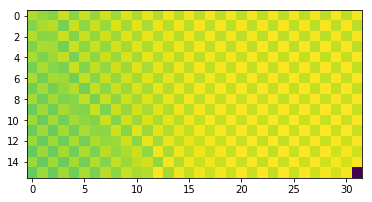

In [20]:
filter_idx = 0
img = visualize_activation(model, layer_id, filter_indices=filter_idx)
plt.imshow(img[..., 0])